In [1]:
import os

import numpy as np
import pandas as pd
import requests
import seaborn as sns
import tensorflow as tf

from matplotlib import pyplot as plt
from PIL import Image
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [2]:
CURRDIR = os.getcwd()
DATADIR = os.path.join(CURRDIR, "..", "data")
IMAGEDIR = os.path.join(DATADIR, "images")
FILEPATH = os.path.join(DATADIR, "1601111410.csv")

In [3]:
labels = pd.read_csv(FILEPATH)
labels.head()

,Unnamed: 0,score,upvote_ratio,title,age,comments,image,url
0,0,15,0.91,Umm yes.,0,1,https://i.redd.it/e733gbk7cap51.jpg,https://redd.it/izlmed
1,1,1582,0.97,Gateway to the ocean in a small Italian town,0,13,https://i.redd.it/8kqnqvarvap51.jpg,https://redd.it/izjy76
2,2,76,0.99,I found this cool reception while walking in B...,1,0,https://i.redd.it/63oxcgxj79p51.jpg,https://redd.it/izft3i
3,3,27,0.94,My kitchen is starting to come together! Just ...,1,0,https://i.redd.it/sz428uj0s6p51.jpg,https://redd.it/izbpt6
4,4,2934,0.99,Was told you guys might like this picture of a...,1,27,https://i.redd.it/arhv6p1564p51.jpg,https://redd.it/iz3ayc


/home/ssoi/.local/share/virtualenvs/accidentallywes-pq8Q8z27/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Log # of Up Votes')

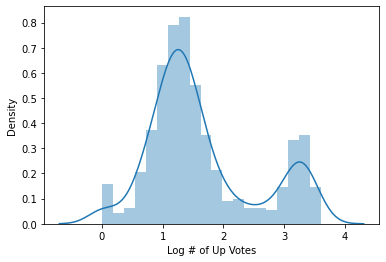

In [4]:
sns.distplot(np.log1p(labels["score"]) / np.log1p(10))
plt.xlabel("Log # of Up Votes")

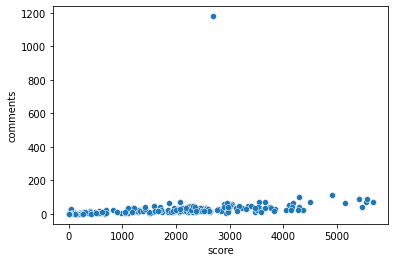

In [5]:
sns.scatterplot(
    x=labels["score"],
    y=labels["comments"],
)

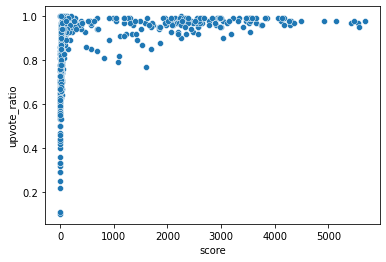

In [6]:
sns.scatterplot(
    x=labels["score"],
    y=labels["upvote_ratio"],
)

In [7]:
labels.iloc[labels["score"].sort_values(ascending=False).index[6]]

Unnamed: 0                                         435
score                                             4915
upvote_ratio                                      0.98
title           The Life Aquatic with Jacques Cousteau
age                                                 79
comments                                           112
image              https://i.redd.it/7ze5e8dlnm951.jpg
url                             https://redd.it/hng7j6
Name: 435, dtype: object

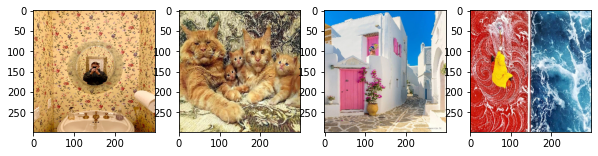

In [8]:
plt.figure(figsize=(10, 16))

for idx in range(4):
    _, filename = os.path.split(labels.iloc[labels["score"].sort_values(ascending=False).index[idx]]["image"])
    filepath = os.path.join(IMAGEDIR, filename)
    image = Image.open(filepath)
    
    plt.subplot(1, 4, idx + 1)
    plt.imshow(image.resize((299, 299)))

In [81]:
def open_image(filepath):
    try:
        image = Image.open(filepath)
        if len(np.array(image).shape) != 3:
            raise ValueError
    except OSError:
        image = None
    except ValueError:
        image = None
    return image

In [82]:
filenames = (os.path.split(image_url)[1] for image_url in labels["image"])
filepaths = (os.path.join(IMAGEDIR, filename) for filename in filenames)
images = (open_image(filepath) for filepath in filepaths)

broken_images = []
processed_images = np.empty((299, 299, 3), np.float32)
for idx, image in enumerate(images):
    if image:
        processed_images = np.append(processed_images, inception_v3.preprocess_input(np.array(image.resize((299, 299)))), axis=0)
    else:
        broken_images.append(idx)

In [85]:
processed_images.shape

(236210, 299, 3)

In [33]:
labels_unbroken = labels.drop(broken_images)

In [29]:
inception_model = inception_v3.InceptionV3(weights="imagenet", include_top=False)

In [30]:
for layer in inception_model.layers:
    inception_model.trainable = False

In [31]:
x = inception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)

predictions = Dense(units=1)(x)

wes_model = Model(inputs=inception_model.input, outputs=predictions)

In [32]:
wes_model.compile(optimizer="rmsprop", loss="mean_squared_logarithmic_error")

In [34]:
wes_model.fit(x=processed_images, y=np.log1p(labels_unbroken["score"]))

ValueError: Data cardinality is ambiguous:
  x sizes: 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299
  y sizes: 801
Please provide data which shares the same first dimension.